<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Camilo Rodriguez.
<br>
<i><b>Asignatura:</b></i> Aprendizaje de maquina.
<br>
<i><b>Estudiante:</b></i> Carlos Andres Rojas Rocha.
<br>
<i><b>Estudiante:</b></i> Laura Carolina Rodriguez Galindo.
<br>
<i><b>Estudiante:</b></i>
<br>
<i><b>Tema:</b></i> Parcial corte 1.
<br>
<i><b>10 Marzo 2023 </b></i>
</FONT>
</div>

# **A. Cross Validation Arboles decision**


In [ ]:
import pandas as pd
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import heapq
import math

In [ ]:
! wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2023-03-10 23:24:14--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.5’

diabetes.csv.5      100%[===================>]  23.31K  --.-KB/s    in 0.001s  

2023-03-10 23:24:14 (36.4 MB/s) - ‘diabetes.csv.5’ saved [23873/23873]



In [ ]:
dt = pd.read_csv('/content/diabetes.csv')
SF = dt.iloc[0:30]
SF_1 = SF[SF.columns[0:3]]
SF_2 = SF['Outcome']
SF = pd.concat([SF_1,SF_2],axis=1)

In [ ]:
SF

,Pregnancies,Glucose,BloodPressure,Outcome
0,6,148,72,1
1,1,85,66,0
2,8,183,64,1
3,1,89,66,0
4,0,137,40,1
5,5,116,74,0
6,3,78,50,1
7,10,115,0,0
8,2,197,70,1
9,8,125,96,1


In [ ]:
scaler = MinMaxScaler()
scaler.fit(SF_1[SF_1.columns])
new_SF = scaler.transform(SF_1[SF_1.columns])
new_SF = pd.DataFrame(new_SF,columns=SF_1.columns)
SF = pd.concat([new_SF,SF_2],axis=1)

In [ ]:
SF

,Pregnancies,Glucose,BloodPressure,Outcome
0,0.461538,0.588235,0.750000,1
1,0.076923,0.058824,0.687500,0
2,0.615385,0.882353,0.666667,1
3,0.076923,0.092437,0.687500,0
4,0.000000,0.495798,0.416667,1
5,0.384615,0.319328,0.770833,0
6,0.230769,0.000000,0.520833,1
7,0.769231,0.310924,0.000000,0
8,0.153846,1.000000,0.729167,1
9,0.615385,0.394958,1.000000,1


In [ ]:
x = SF[SF.columns[0:3]]
y = SF["Outcome"]

In [ ]:
class Arbol(object):

  def __init__(self):
    self.mejores_condicionales = []

  #Recibe como parametro las posibilidades de la caja como una lista
  def entropia_caja(self,pro_evento):
    suma = 0
    for i in range(len(pro_evento)):
      if pro_evento[i]!=0:
            suma += pro_evento[i]*math.log(pro_evento[i],2)
    return -suma

  def crear_arbol(self,train_x,train_y,profundidad):

    columnas = [] #coulmnas de X ordenadas

    for i in range(len(train_x.columns)):
      aux = pd.concat([train_x[train_x.columns[i]],train_y],axis=1) #concatenamos columna Xn con y
      aux = aux.sort_values(train_x.columns[i])  #Ordenamos
      columnas.append(aux.values)

    condicionales = []

    # for para hallar todos los posibles condicionales
    for i in columnas:
      aux = []
      for j in range(len(i)-1):
        if i[j][0] !=  i[j+1][0]:
          aux.append((i[j][0]+i[j+1][0])/2)
      condicionales.append(aux)
    #print(condicionales)
    entropia = 0
    condicional = 0
    columna = 0

    print('profundidad: ',profundidad)
    for i in range(len(condicionales)): # cuantas columnas hay
      for j in range(len(condicionales[i])): # cuantos condicionales tiene cada columna
        caja1_verde=0
        caja1_roja=0
        caja2_verde=0
        caja2_roja=0
        for k in range(len(columnas[i])): # cuantos valores de x son superior o inferior al condicional
          if columnas[i][k][0] <= condicionales[i][j]:
              if columnas[i][k][1] == 1:
                caja1_verde+=1
              else:
                caja1_roja+=1
          else:
              if columnas[i][k][1] == 1:
                caja2_verde+=1
              else:
                caja2_roja+=1
        #Fuera del ultimo for se calcula la entropia
        #verde | rojo
        totalc1 = caja1_verde+caja1_roja
        caja1 = [caja1_verde/totalc1, caja1_roja/totalc1]
        totalc2 = caja2_verde+caja2_roja
        caja2 = [caja2_verde/totalc2, caja2_roja/totalc2]
        total = totalc1 + totalc2
        entro1 = self.entropia_caja(caja1)
        entro2 = self.entropia_caja(caja2)
        entro_total = (totalc1/total)*entro1 + (totalc2/total)*entro2
        print("entropia: ",entro_total,"   condicional: ",condicionales[i][j])
        if entro_total>entropia:
          entropia=entro_total
          columna = i
          condicional = condicionales[i][j]
    self.mejores_condicionales.append(condicional)

    #dividir y pasar
    aux_x = pd.concat([train_x,train_y],axis=1)
    aux_x = (aux_x.sort_values(aux_x.columns[columna])).values
    index = 0
    for i in range(len(aux_x)-1,0,-1):
      if aux_x[i][0]>=condicional:
        index = i
        break

    new_x1 = pd.DataFrame(aux_x).iloc[0:index]
    new_y1 = new_x1[len(new_x1.columns)-1]
    new_x1 = new_x1.drop(3,axis=1)

    if profundidad>1:
      self.crear_arbol(new_x1,new_y1,profundidad-1)

  def mejores(self):
    for i in self.mejores_condicionales:
      print(i)

In [ ]:
x1 = x.iloc[0:10]
y1 = y.iloc[0:10]
arbolito_1 = Arbol()
arbolito_1.crear_arbol(x1,y1,3)
arbolito_1.mejores()

profundidad:  3
entropia:  0.8919684538544    condicional:  0.038461538461538464
entropia:  0.8796731482129885    condicional:  0.11538461538461539
entropia:  0.9509775004326937    condicional:  0.19230769230769232
entropia:  0.9709505944546686    condicional:  0.3076923076923077
entropia:  0.9245112497836532    condicional:  0.42307692307692313
entropia:  0.965148445440323    condicional:  0.5384615384615385
entropia:  0.8264662506490407    condicional:  0.6923076923076923
entropia:  0.8919684538544    condicional:  0.02941176470588236
entropia:  0.963547202339972    condicional:  0.07563025210084034
entropia:  0.8796731482129885    condicional:  0.20168067226890757
entropia:  0.7145247027726656    condicional:  0.31512605042016806
entropia:  0.36096404744368116    condicional:  0.35714285714285715
entropia:  0.5509775004326937    condicional:  0.4453781512605042
entropia:  0.6896596952239761    condicional:  0.542016806722689
entropia:  0.8    condicional:  0.7352941176470588
entropi

# **B. Comprobacion con arboles de decisiòn**

In [ ]:
cv_results = cross_validate(DecisionTreeClassifier(criterion='entropy',max_depth=3),x, y, cv=3, return_train_score=True, return_estimator=True)

In [ ]:
cv_results

{'fit_time': array([0.00841856, 0.00262761, 0.00295186]),
 'score_time': array([0.00215554, 0.00175166, 0.00219893]),
 'estimator': [DecisionTreeClassifier(criterion='entropy', max_depth=3),
  DecisionTreeClassifier(criterion='entropy', max_depth=3),
  DecisionTreeClassifier(criterion='entropy', max_depth=3)],
 'test_score': array([0.6, 0.5, 0.5]),
 'train_score': array([0.8 , 0.95, 0.8 ])}

In [ ]:
print("Primer arbol: ")
print("Accuracy train: ",cv_results['train_score'][0])
print("Accuracy test: ",cv_results['test_score'][0])

Primer arbol: 
Accuracy train:  0.8
Accuracy test:  0.6


[Text(0.6, 0.875, 'x[1] <= 0.571\nentropy = 0.971\nsamples = 20\nvalue = [8, 12]\nclass = 1'),
 Text(0.4, 0.625, 'x[1] <= 0.181\nentropy = 0.997\nsamples = 15\nvalue = [8, 7]\nclass = 0'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.6, 0.375, 'x[2] <= 0.802\nentropy = 0.996\nsamples = 13\nvalue = [6, 7]\nclass = 1'),
 Text(0.4, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = 1'),
 Text(0.8, 0.125, 'entropy = 0.954\nsamples = 8\nvalue = [5, 3]\nclass = 0'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = 1')]

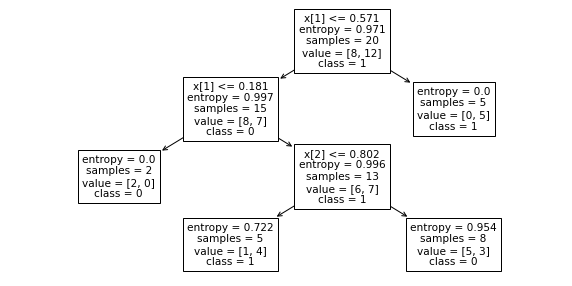

In [ ]:
plt.figure(figsize=(10, 5))
tree.plot_tree(cv_results['estimator'][0],class_names=["0","1"])

In [ ]:
print("Segundo arbol: ")
print("Accuracy train: ",cv_results['train_score'][1])
print("Accuracy test: ",cv_results['test_score'][1])

Segundo arbol: 
Accuracy train:  0.95
Accuracy test:  0.5


[Text(0.5, 0.875, 'x[1] <= 0.336\nentropy = 0.971\nsamples = 20\nvalue = [8, 12]\nclass = 1'),
 Text(0.25, 0.625, 'x[1] <= 0.029\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]\nclass = 0'),
 Text(0.125, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.375, 0.375, 'x[1] <= 0.244\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]\nclass = 0'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.5, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(0.75, 0.625, 'x[0] <= 0.923\nentropy = 0.439\nsamples = 11\nvalue = [1, 10]\nclass = 1'),
 Text(0.625, 0.375, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = 1'),
 Text(0.875, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0')]

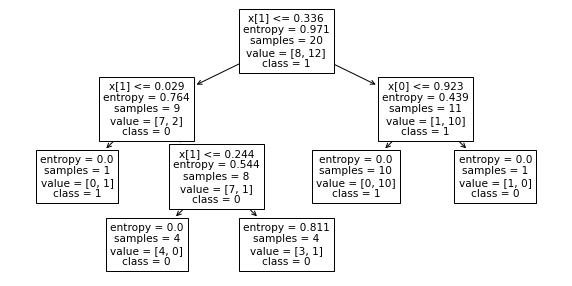

In [ ]:
plt.figure(figsize=(10, 5))
tree.plot_tree(cv_results['estimator'][1],class_names=["0","1"])

In [ ]:
print("Tercer arbol: ")
print("Accuracy train: ",cv_results['train_score'][2])
print("Accuracy train: ",cv_results['test_score'][2])

Tercer arbol: 
Accuracy train:  0.8
Accuracy train:  0.5


[Text(0.6, 0.875, 'x[1] <= 0.55\nentropy = 0.971\nsamples = 20\nvalue = [8, 12]\nclass = 1'),
 Text(0.4, 0.625, 'x[0] <= 0.038\nentropy = 0.985\nsamples = 14\nvalue = [8, 6]\nclass = 0'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.6, 0.375, 'x[0] <= 0.154\nentropy = 0.918\nsamples = 12\nvalue = [8, 4]\nclass = 0'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.8, 0.125, 'entropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = 0'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 1')]

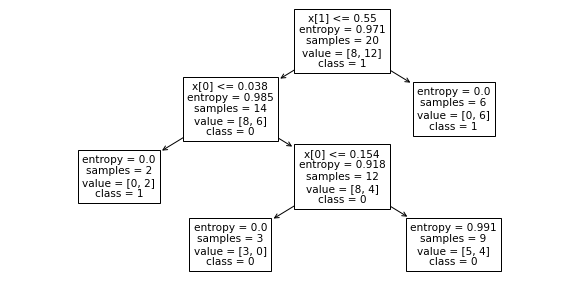

In [ ]:
plt.figure(figsize=(10, 5))
tree.plot_tree(cv_results['estimator'][2],class_names=["0","1"])

In [ ]:
train_score_std = np.std(cv_results['train_score'])
test_score_std = np.std(cv_results['test_score'])
print("Desviación estándar de train_score: +-", train_score_std)
print("Desviación estándar de test_score: +-", test_score_std)

Desviación estándar de train_score: +- 0.07071067811865471
Desviación estándar de test_score: +- 0.04714045207910316


## **C. DIBUJOS**

Grafica sin fronteras

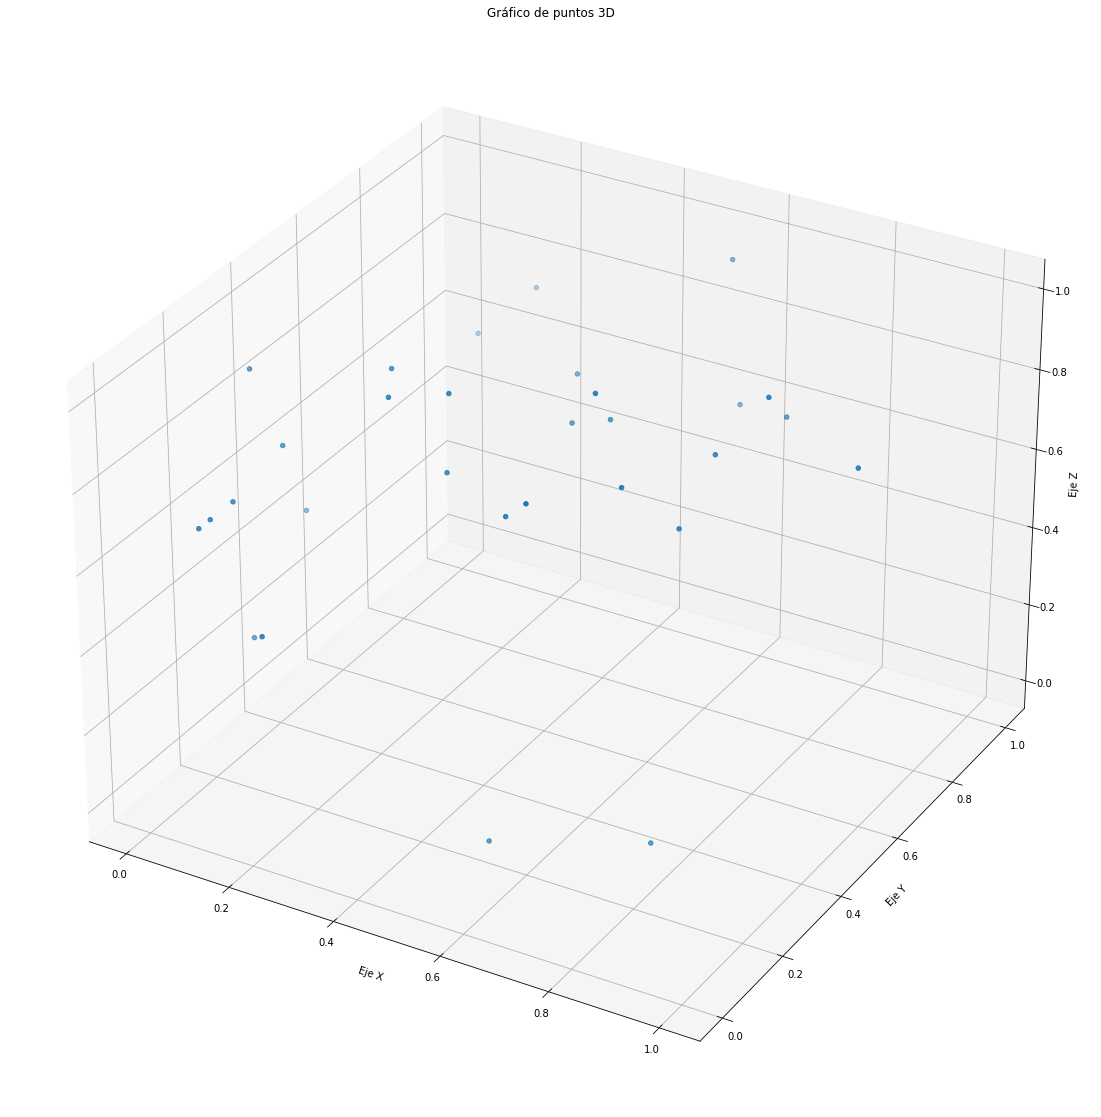

In [ ]:
x0 = SF[SF.columns[0]]
x1 = SF[SF.columns[1]]
x2 = SF[SF.columns[2]]


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x0, x1, x2)

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Gráfico de puntos 3D')


plt.show()

Grafica con fronteras

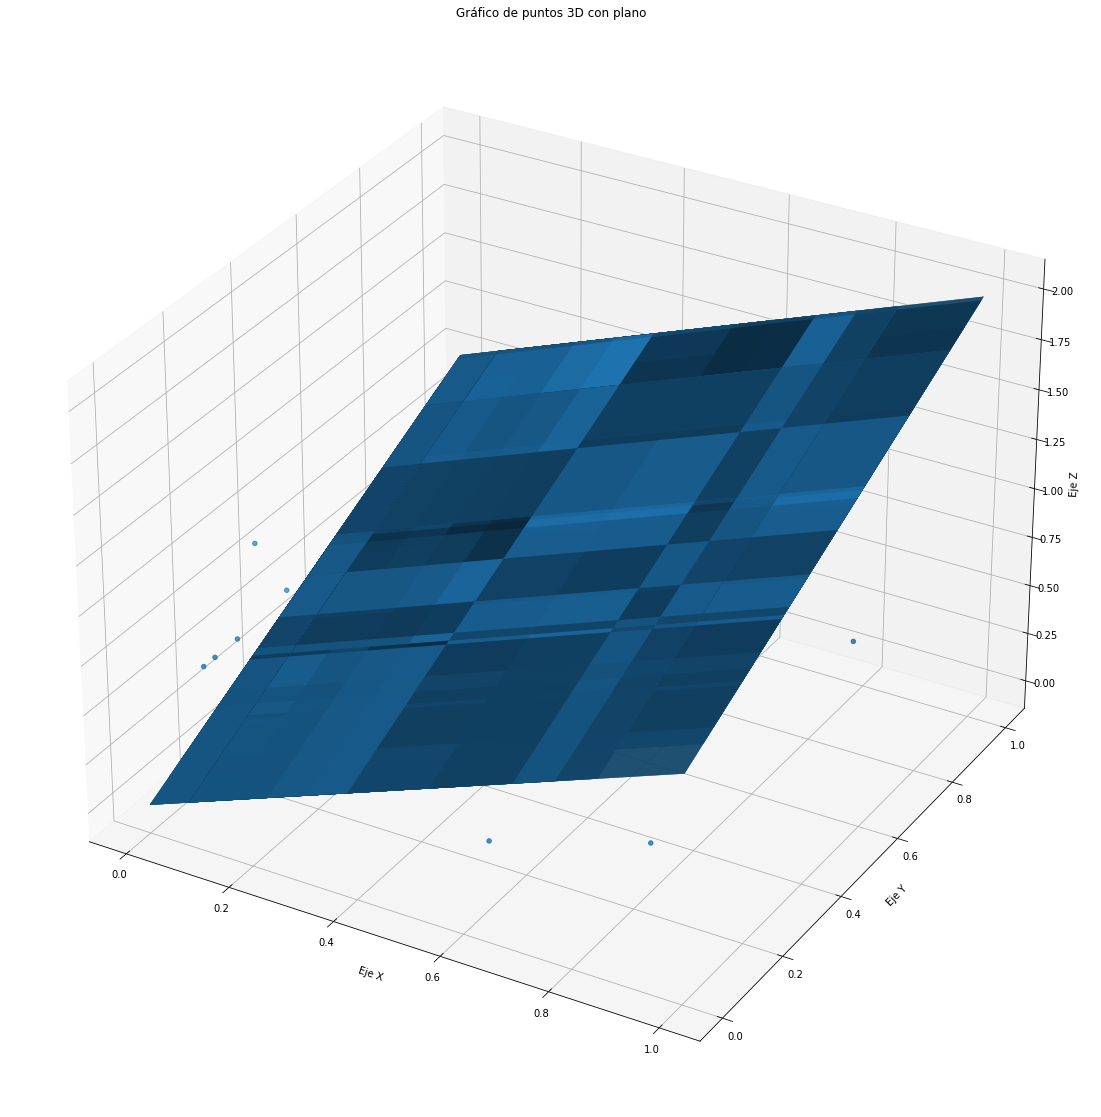

In [ ]:
x0 = SF[SF.columns[0]]
x1 = SF[SF.columns[1]]
x2 = SF[SF.columns[2]]


def plane_eq(p1, p2, p3):
    n = np.cross(p2 - p1, p3 - p1)
    d = -np.dot(n, p1)
    return lambda x, y: (-n[0] * x - n[1] * y - d) / n[2]


p1 = np.array([x0.min(), x1.min(), x2.min()])
p2 = np.array([x0.min(), x1.max(), x2.max()])
p3 = np.array([x0.max(), x1.min(), x2.max()])


plane = plane_eq(p1, p2, p3)


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x0, x1, x2)


X, Y = np.meshgrid(x0, x1)
Z = plane(X, Y)
ax.plot_surface(X, Y, Z, alpha=0.5)


ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Gráfico de puntos 3D con plano')


plt.show()

# **C. Dibujos**

**grafica sin fronteras**

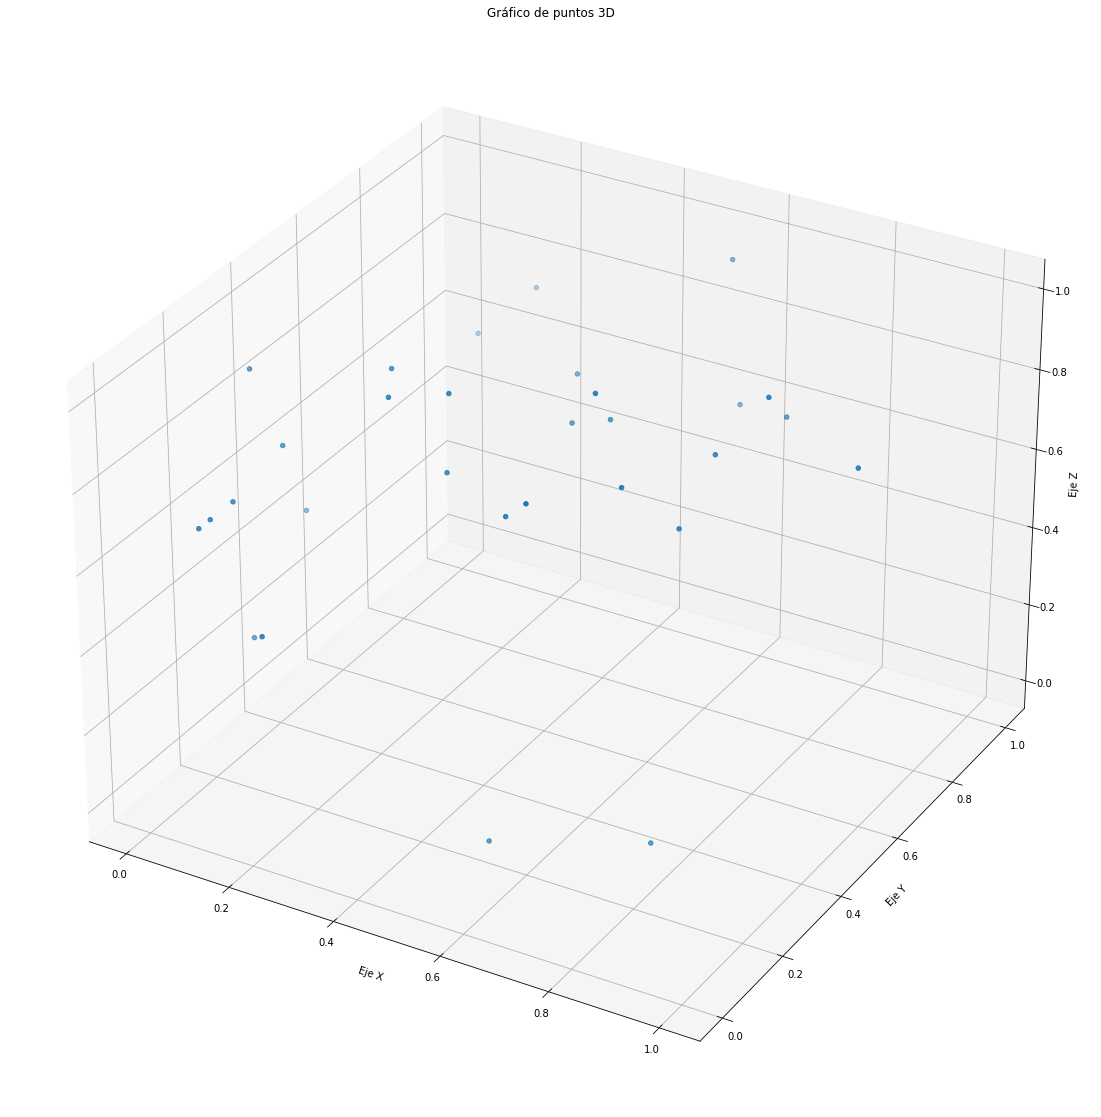

In [ ]:
x0 = SF[SF.columns[0]]
x1 = SF[SF.columns[1]]
x2 = SF[SF.columns[2]]


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x0, x1, x2)

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Gráfico de puntos 3D')


plt.show()

**Graficas con fronteras**

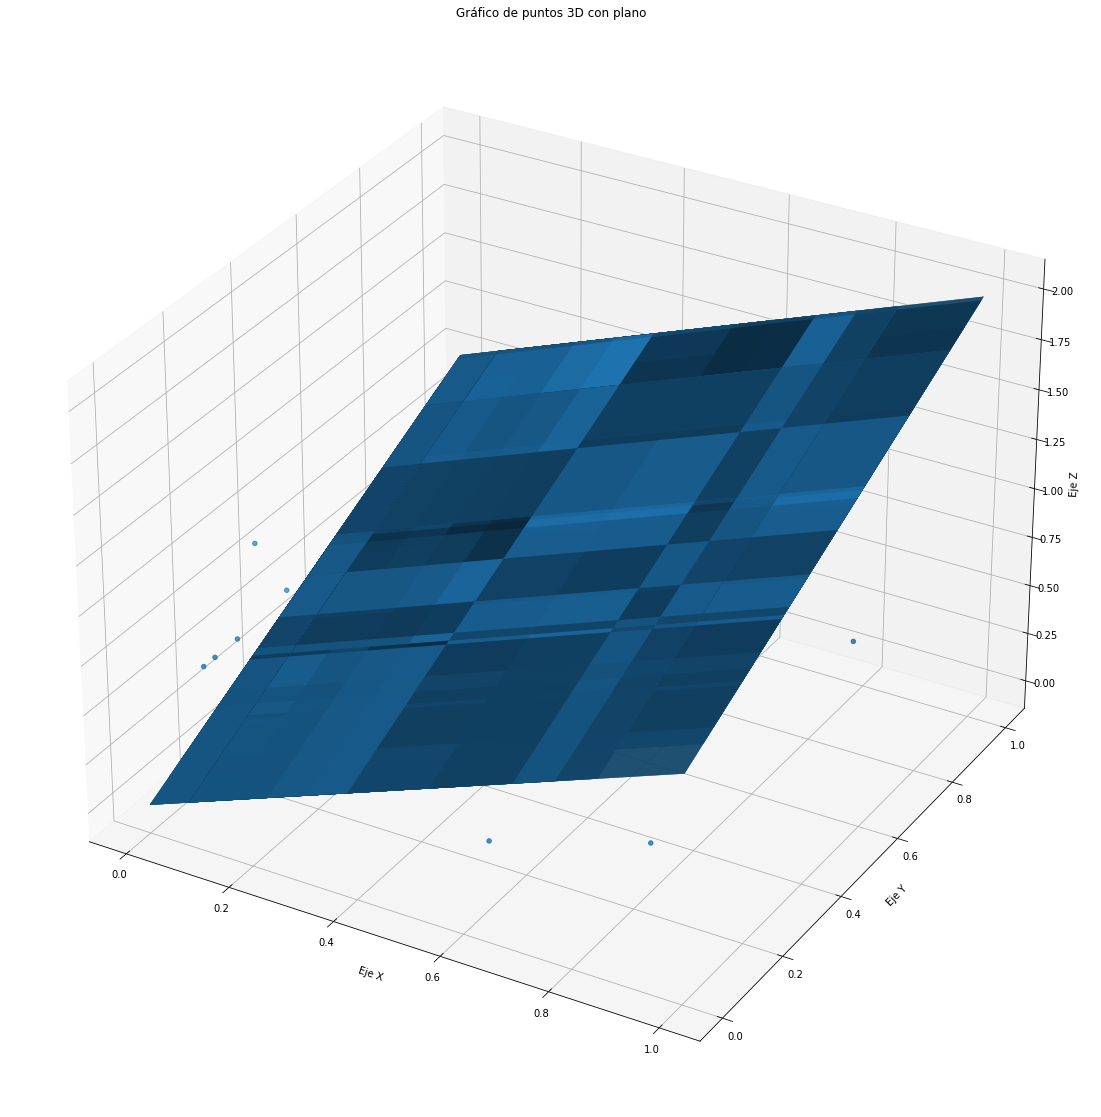

In [ ]:
x0 = SF[SF.columns[0]]
x1 = SF[SF.columns[1]]
x2 = SF[SF.columns[2]]


def plane_eq(p1, p2, p3):
    n = np.cross(p2 - p1, p3 - p1)
    d = -np.dot(n, p1)
    return lambda x, y: (-n[0] * x - n[1] * y - d) / n[2]


p1 = np.array([x0.min(), x1.min(), x2.min()])



plane = plane_eq(p1, p2, p3)


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x0, x1, x2)


X, Y = np.meshgrid(x0, x1)
Z = plane(X, Y)
ax.plot_surface(X, Y, Z, alpha=0.5)


ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Gráfico de puntos 3D con plano')


plt.show()

# **D. Cross validation con KNN**

In [ ]:
SF1 = SF.iloc[0:10]
SF2 = SF.iloc[10:20]
SF3 = SF.iloc[20:30]

In [ ]:
class KNN(object):

  def __init__(self,SF_train):
    self.SF_train = SF_train.values

  def crearmodelo(self, predict):
    nice = 0
    i = 0

    while i < len(predict):
      file = predict.iloc[i].values
      y_predict = self.calcularpunto(file)

      if y_predict == file[3]:
        nice += 1
      i += 1

    return nice/(len(predict))

  def calcularpunto(self,punto):
    lista_aux = []

    i = 0
    while i < len(self.SF_train):
      suma = pow((punto[0]-self.SF_train[i][0]),2)+pow((punto[1]-self.SF_train[i][1]),2)+pow((punto[2]-self.SF_train[i][2]),2)
      euc = math.sqrt(suma)
      lista_aux.append(euc)
      i += 1


    indices = []
    chiquitos_3 = heapq.nsmallest(3,lista_aux)


    i = 0
    while i < len(chiquitos_3):
      j = 0
      while j < len(lista_aux):
        if chiquitos_3[i] == lista_aux[j]:
          indices.append(lista_aux.index(chiquitos_3[i]))
          break
        j += 1
      i += 1

    uno = 0
    cero = 0
    i = 0
    while i < 3:

      if self.SF_train[indices[i]][3] == 1:
        uno += 1
      else:
         cero+=1
      i+=1
    if uno>cero:
      return 1
    return 0

In [ ]:
#COMPROBACION DE QUE KNN INDIVIDUAL SI DA
problema = KNN(SF1)
print('train_score :',problema.crearmodelo(SF1))
print('test_score :',problema.crearmodelo(pd.concat([SF2,SF3],axis=0)))

train_score : 0.6
test_score : 0.6


# **E. Comprobacion**

In [ ]:
cv_results2= cross_validate(KNeighborsClassifier(n_neighbors=3),x, y, cv=3, return_train_score=True, return_estimator=True)


In [ ]:
cv_results2

{'fit_time': array([0.00558257, 0.00306106, 0.00228143]),
 'score_time': array([0.00531697, 0.00285482, 0.00336814]),
 'estimator': [KNeighborsClassifier(n_neighbors=3),
  KNeighborsClassifier(n_neighbors=3),
  KNeighborsClassifier(n_neighbors=3)],
 'test_score': array([0.4, 0.6, 0.7]),
 'train_score': array([0.8 , 0.75, 0.75])}

In [ ]:
print("Primer modelo: ")
print("Accuracy train: ",cv_results2['train_score'][0])
print("Accuracy train: ",cv_results2['test_score'][0])

Primer modelo: 
Accuracy train:  0.8
Accuracy train:  0.4


In [ ]:
print("Segundo modelo: ")
print("Accuracy train: ",cv_results2['train_score'][1])
print("Accuracy train: ",cv_results2['test_score'][1])

Segundo modelo: 
Accuracy train:  0.75
Accuracy train:  0.6


In [ ]:
print("Tercer Modelo")
print("Accuracy train: ",cv_results2['train_score'][2])
print("Accuracy train: ",cv_results2['test_score'][2])

Tercer Modelo
Accuracy train:  0.75
Accuracy train:  0.7


In [ ]:
train_score2_std = np.std(cv_results2['train_score'])
test_score2_std = np.std(cv_results2['test_score'])
print("Desviación estándar de train_score: +-", train_score2_std)
print("Desviación estándar de test_score: +-", test_score2_std)

Desviación estándar de train_score: +- 0.023570226039551608
Desviación estándar de test_score: +- 0.12472191289246469


# **PARTE 2**

# **Importar datos y escalar**

In [ ]:
notas = pd.read_csv("https://raw.githubusercontent.com/seb03990/Parcial1_ML/main/school_grades_dataset.csv")

In [ ]:
notas

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
for i in notas.columns:
    if str(notas[i].dtype) == 'object':
     notas.drop([i],axis=1,inplace=True)

notas.drop(['G1','G2'],axis=1,inplace=True)

In [ ]:
notas

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10
645,18,3,1,1,2,0,4,3,4,1,1,1,4,16
646,18,1,1,2,2,0,1,1,1,1,1,5,6,9
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10


In [ ]:
X = notas[notas.columns[0:13]]
Y = notas['G3']
scaler2 = MinMaxScaler()
scaler2.fit(X[X.columns])
new_SF = scaler2.transform(X[X.columns])
new_SF = pd.DataFrame(new_SF,columns=X.columns)
notas = pd.concat([new_SF,Y],axis=1)

In [ ]:
notas

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0.428571,1.00,1.00,0.333333,0.333333,0.000000,0.75,0.50,0.75,0.00,0.00,0.50,0.1250,11
1,0.285714,0.25,0.25,0.000000,0.333333,0.000000,1.00,0.50,0.50,0.00,0.00,0.50,0.0625,11
2,0.000000,0.25,0.25,0.000000,0.333333,0.000000,0.75,0.50,0.25,0.25,0.50,0.50,0.1875,12
3,0.000000,1.00,0.50,0.000000,0.666667,0.000000,0.50,0.25,0.25,0.00,0.00,1.00,0.0000,14
4,0.142857,0.75,0.75,0.000000,0.333333,0.000000,0.75,0.50,0.25,0.00,0.25,1.00,0.0000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0.571429,0.50,0.75,0.000000,0.666667,0.333333,1.00,0.75,0.25,0.00,0.25,1.00,0.1250,10
645,0.428571,0.75,0.25,0.000000,0.333333,0.000000,0.75,0.50,0.75,0.00,0.00,0.00,0.1250,16
646,0.428571,0.25,0.25,0.333333,0.333333,0.000000,0.00,0.00,0.00,0.00,0.00,1.00,0.1875,9
647,0.285714,0.75,0.25,0.333333,0.000000,0.000000,0.25,0.75,1.00,0.50,0.75,0.25,0.1875,10


In [ ]:
X = notas[notas.columns[0:13]]

# **Cross validation con arboles de decision**

In [ ]:
best = 0
profundidad = 0
index = 0
kk = KFold(n_splits=5, shuffle=False)
i = 2
j = 0
#agregar niveles
while i < 13:
    notes_results = cross_validate(DecisionTreeClassifier(criterion='entropy', max_depth=i), X, Y, cv=kk, return_train_score=True, return_estimator=True)

    while j < 5:
        suma = 0
        suma = (notes_results['test_score'][j]+notes_results['train_score'][j]).mean()
        promedio = suma/2

        if promedio > best:
            best = promedio
            profundidad, index = i, j

        j += 1

    i += 1
    j = 0

print(' Profundidad ',profundidad,' | Modelo ',index,' | Prom Score ',best)

 Profundidad  12  | Modelo  1  | Prom Score  0.5624425670668445


# **Cross validation con KNN**

In [ ]:
kk2 = KFold(n_splits=5, shuffle=False)
i = 2
j = 0
best2 = 0
profundidad2 = 0
index2 = 0
while i < 5:
    notes_results2 = cross_validate(KNeighborsClassifier(n_neighbors=i), X, Y, cv=kk2, return_train_score=True, return_estimator=True)
    while j < 5:
        suma = 0
        suma = (notes_results2['test_score'][j]+notes_results2['train_score'][j]).mean()
        promedio2 = suma/2
        if promedio2 > best2:
            best2 = promedio2
            profundidad2, index2 = i, j
        j += 1
    i += 1
    j = 0

print(' Vecinos ',profundidad2,' | Modelo ',index2,' | Prom Score ',best2)


 Vecinos  2  | Modelo  1  | Prom Score  0.39095894471617015


In [ ]:
if(best > best2):
  print("Es mejor el modelo creado con arboles")

else:
  print("Es mejor el modelo creado con KNN")


Es mejor el modelo creado con arboles
